In [ ]:
from torch_geometric.transforms import AddRandomWalkPE
from torch_geometric.utils import dense_to_sparse

In [116]:
import torch

a = torch.tensor([
    [0,1,1,0,0],
    [1,0,1,1,0],
    [1,1,0,0,1],
    [0,1,0,0,1],
    [0,0,1,1,0]
])
def quad(a, times):
    for _ in range(times):
        a = torch.cat([a,a],dim=1)
        a = torch.cat([a,a],dim=0)
    return a

a= quad(a,2)


index, weight = dense_to_sparse(a)

In [ ]:
a.shape

torch.Size([10240, 10240])

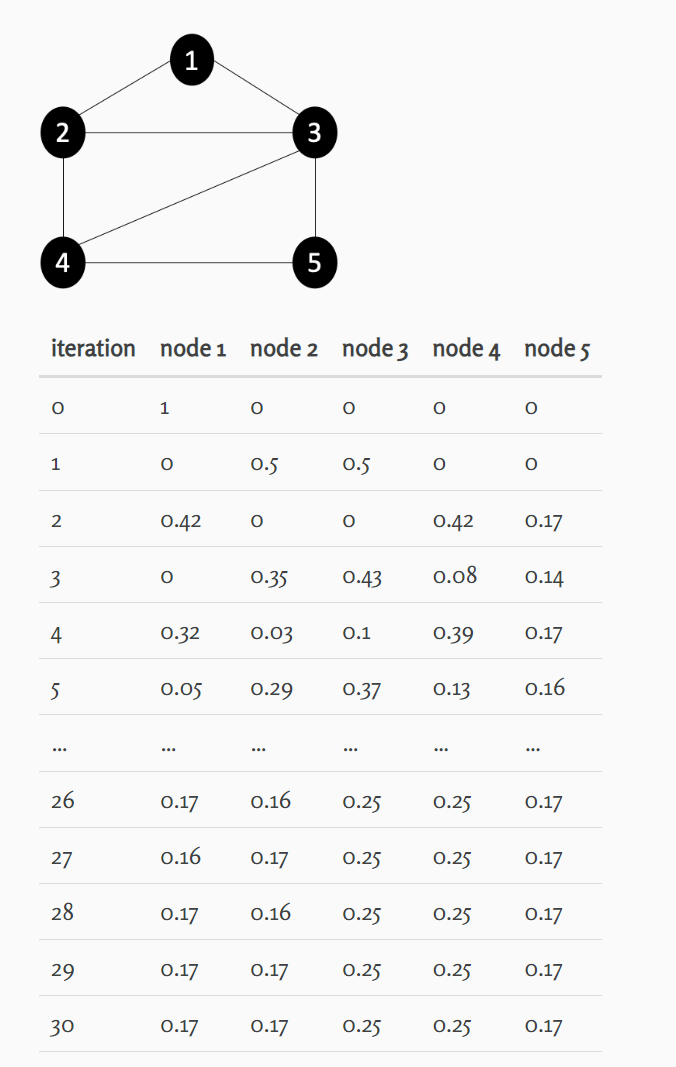

In [108]:
transform = AddRandomWalkPE(4, 'randomwalkpe')
from torch_geometric.data import Data
data = Data(num_nodes=5)
data.edge_index = index
transform(data).randomwalkpe

RuntimeError: index 5 is out of bounds for dimension 0 with size 5

In [211]:




num_walks = 50
walk_length = 5
n_positive_nodes = 10
rw_nodes, rw_edges = random_walk(row=index[0,:],col=index[1,:], start=torch.tensor([0 for _ in range(num_walks)]), walk_length=walk_length, return_edge_indices=True)

idx, count = rw_nodes.unique(return_counts=True)
sorted_counts, sorting_index = count.sort(descending=True)
sorted_idx = idx[sorting_index]

positive_nodes = sorted_idx[1:n_positive_nodes+1]
l1norm = walk_length * num_walks
normalized_weights = positive_nodes/l1norm


In [196]:
for node in positive_nodes:
    print(node.item())

6
16
11
2
12
7
17
15
5
18


In [212]:
condition = torch.isin(rw_nodes, positive_nodes)[:,1:]
positive_edges = rw_edges[condition]

In [215]:
positive_nodes

tensor([16,  6,  7,  2, 12,  1, 17, 11, 15, 10])

In [218]:
positive_edges

tensor([  4,  92,   0,   2,  65, 151,   5, 190, 174,   4, 105,   6,   0,  12,
         78, 159, 123,   5,  52, 114,   7,  90,  74,  97,   0, 180, 105,  21,
          6,  82,  55,   2,  62,  99,  75,   5,  44, 126, 161,   2,  65, 144,
          1,   6, 134,   4, 111,   1,  30, 158,  98,   0, 132, 108,   1,  50,
         66, 165,   6, 153,  21,  48,   6, 156,   6, 158, 100, 108,   3,  72,
          6,   6,  52, 111,   1,  29, 151,   1,   6, 184,  21,   2,   3,   1,
          3,  69, 182, 156,   4, 114, 168,   5,   7, 174, 178,   6, 161, 150,
        159,   6, 159,  42,   0,   0,  80,   1,  24,  65, 150,   6, 162, 170,
         96,   3,  92, 123,   3,  72,  62, 101,   1,  26,  99,   1,   1,  29,
        145,   7, 170,  97,  24,   0,   6,   5,   1,  29, 149, 120,   5, 126,
        156,  72,   3,  77, 146,  60,  72,   1,  27, 114, 168,   1,  29, 146,
        130,   3, 138,   2,  60,   7,   5,  92,   6, 158,  98,  63,   0,   3,
         46])

In [222]:
index[:,92]

tensor([ 9, 12])

In [214]:
rw_nodes

tensor([[ 0, 11,  8,  9, 12, 14],
        [ 0,  1,  0,  6, 15, 17],
        [ 0, 12, 19, 17, 16,  8],
        [ 0, 11,  2,  0, 16, 18],
        [ 0,  1,  7, 16, 12, 11],
        [ 0, 12,  5, 11, 17, 19],
        [ 0, 17,  9,  7, 10,  2],
        [ 0,  1, 18, 11,  2,  1],
        [ 0, 16,  8,  6,  5, 17],
        [ 0,  6, 10,  7, 11,  5],
        [ 0, 12,  4, 12, 16, 15],
        [ 0,  6, 15,  1,  0,  2],
        [ 0, 16, 13, 16,  3,  9],
        [ 0, 11, 12,  4, 18, 14],
        [ 0,  2, 16, 10,  6,  8],
        [ 0,  1, 13, 11,  7, 14],
        [ 0,  2,  5,  6, 17,  1],
        [ 0, 16,  2,  1,  5,  1],
        [ 0, 16,  7, 14,  8,  9],
        [ 0, 16, 10, 11,  7, 14],
        [ 0,  7,  6,  0, 16,  5],
        [ 0, 16,  5, 11, 12,  9],
        [ 0,  2, 15, 17,  0,  2],
        [ 0, 16, 13, 19,  2,  1],
        [ 0,  6,  0,  7,  0,  2],
        [ 0,  7,  1, 18, 16,  7],
        [ 0, 11, 17,  6,  0, 12],
        [ 0, 17, 16, 18,  6,  0],
        [ 0, 16, 15, 16, 12,  0],
        [ 0, 1

In [213]:
positive_edges

tensor([  4,  92,   0,   2,  65, 151,   5, 190, 174,   4, 105,   6,   0,  12,
         78, 159, 123,   5,  52, 114,   7,  90,  74,  97,   0, 180, 105,  21,
          6,  82,  55,   2,  62,  99,  75,   5,  44, 126, 161,   2,  65, 144,
          1,   6, 134,   4, 111,   1,  30, 158,  98,   0, 132, 108,   1,  50,
         66, 165,   6, 153,  21,  48,   6, 156,   6, 158, 100, 108,   3,  72,
          6,   6,  52, 111,   1,  29, 151,   1,   6, 184,  21,   2,   3,   1,
          3,  69, 182, 156,   4, 114, 168,   5,   7, 174, 178,   6, 161, 150,
        159,   6, 159,  42,   0,   0,  80,   1,  24,  65, 150,   6, 162, 170,
         96,   3,  92, 123,   3,  72,  62, 101,   1,  26,  99,   1,   1,  29,
        145,   7, 170,  97,  24,   0,   6,   5,   1,  29, 149, 120,   5, 126,
        156,  72,   3,  77, 146,  60,  72,   1,  27, 114, 168,   1,  29, 146,
        130,   3, 138,   2,  60,   7,   5,  92,   6, 158,  98,  63,   0,   3,
         46])

In [205]:
rw_nodes

tensor([[ 0, 16,  8,  9, 13, 19],
        [ 0, 17, 14,  8,  9, 17],
        [ 0,  2, 16, 18, 14, 18],
        [ 0,  1, 13,  6,  5,  6],
        [ 0, 16, 12,  4, 12,  5],
        [ 0, 11,  2, 16, 10,  6],
        [ 0,  6,  5, 12, 19, 17],
        [ 0,  6, 17, 11,  0, 11],
        [ 0, 17,  5,  6,  7,  6],
        [ 0, 11,  3,  6,  8, 11],
        [ 0,  2,  0,  2,  0, 11],
        [ 0,  7, 16, 10, 17, 16],
        [ 0, 12,  9, 17,  5, 12],
        [ 0,  6, 18,  9, 12,  5],
        [ 0, 16, 13,  6, 10,  7],
        [ 0, 16,  8, 11,  7,  5],
        [ 0, 12, 15,  7,  6,  7],
        [ 0, 16,  8,  9, 13,  6],
        [ 0,  6, 10,  6, 15, 11],
        [ 0, 17, 16, 18,  1, 15],
        [ 0,  6, 15, 11,  8,  4],
        [ 0, 12,  6,  3, 16,  7],
        [ 0, 17, 10, 12, 11, 17],
        [ 0,  6,  2,  5, 16,  5],
        [ 0,  2, 19,  7, 11,  2],
        [ 0,  2,  0,  7,  4, 18],
        [ 0, 12, 19,  2,  4,  2],
        [ 0, 11,  3,  9, 17,  6],
        [ 0, 11, 15, 11,  7, 10],
        [ 0,  

In [200]:
indices

(tensor([ 0,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
          6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10,
         10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15,
         15, 15, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20,
         20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24,
         24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30,
         30, 30, 30, 30, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 35,
         35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 39, 39, 39, 39, 40, 40, 40,
         41, 41, 41, 42, 42, 42, 42, 43, 43, 44, 44, 45, 45, 45, 46, 46, 46, 46,
         46, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49]),
 tensor([1, 1, 5, 1, 2, 3, 5, 3, 4, 5, 1, 2, 4, 5, 1, 2, 3, 5, 1, 2, 3, 5, 1, 2,
         3, 5, 1, 2, 3, 4, 5, 1, 3, 5, 1, 3, 5, 1, 2, 4, 5, 1, 3, 4, 5, 1, 2, 4,
         5, 1, 3, 5, 1, 3, 4, 5, 1, 2, 3, 

In [192]:
rw_edges

tensor([[  6, 157,  83,  93, 135],
        [  7, 172, 139,  83,  94],
        [  1,  30, 163, 181, 143],
        [  0,  16, 130,  59,  50],
        [  6, 159, 118,  44, 119],
        [  4, 105,  30, 158,  98],
        [  2,  59,  53, 127, 190],
        [  2,  66, 171, 104,   4],
        [  7, 167,  50,  60,  72],
        [  4, 106,  34,  61,  84],
        [  1,  20,   1,  20,   4],
        [  3,  78, 158, 103, 174],
        [  5, 121,  94, 167,  53],
        [  2,  67, 179,  92, 119],
        [  6, 160, 130,  62,  99],
        [  6, 157,  84, 108,  71],
        [  5, 125, 147,  72,  60],
        [  6, 157,  83,  93, 130],
        [  2,  62,  98,  65, 148],
        [  7, 174, 163, 176,  17],
        [  2,  65, 148, 109,  81],
        [  5, 120,  58,  38, 156],
        [  7, 170, 101, 123, 114],
        [  2,  57,  23,  54, 155],
        [  1,  31, 186,  75, 105],
        [  1,  20,   3,  70,  47],
        [  5, 127, 184,  22,  40],
        [  4, 106,  35,  94, 168],
        [  4, 113, 1

In [193]:
index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
          3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
          9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
         11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
         15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
         16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
         18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19],
        [ 1,  2,  6,  7, 11, 12, 16, 17,  0,  2,  3,  5,  7,  8, 10, 12, 13, 15,
         17, 18,  0,  1,  4,  5,  6,  9, 10, 11, 14

In [ ]:
positive_nodes

In [182]:
rws

tensor([[ 0,  1,  7,  0, 16,  3],
        [ 0, 12, 11, 13,  6,  0],
        [ 0, 11, 10,  2, 16,  0],
        [ 0,  7,  1, 13, 16, 10],
        [ 0,  1, 12,  5,  7,  4],
        [ 0,  6, 18, 19,  2, 15],
        [ 0, 16,  7, 14,  3, 16],
        [ 0,  6,  0,  6,  0, 17],
        [ 0, 16, 18,  1,  0, 11],
        [ 0,  2, 14, 12,  1,  7],
        [ 0,  7, 10, 12,  1, 15],
        [ 0,  6, 17, 14, 12, 15],
        [ 0,  7,  9, 12,  0, 11],
        [ 0, 16,  0,  7, 15, 16],
        [ 0, 16,  5,  1, 15,  1],
        [ 0,  7,  4,  3, 16, 10],
        [ 0,  2, 14,  3,  4,  3],
        [ 0, 11,  7,  1, 13,  4],
        [ 0, 17, 11, 15,  7,  4],
        [ 0,  2,  0, 11, 13, 19],
        [ 0,  2,  5,  7, 15, 12],
        [ 0,  6,  0,  6,  0,  2],
        [ 0,  6,  3, 16,  0, 11],
        [ 0, 12,  9,  8, 14,  7],
        [ 0,  1,  5,  2,  1,  3],
        [ 0, 16,  8, 19,  8,  1],
        [ 0,  1,  5,  1, 17,  1],
        [ 0,  7, 15,  7,  4, 17],
        [ 0, 12,  6, 13, 14,  3],
        [ 0, 1

In [148]:
sorted_counts

tensor([58, 27, 22, 21, 19, 17, 14, 14, 11, 11, 11, 11, 11, 11, 10,  9,  8,  6,
         5,  4])

In [150]:
l1norm

250

In [126]:
sorted_values

tensor([408, 122, 117, 113, 111, 104,  96,  91,  89,  66,  60,  56,  48,  46,
         43,  42,  42,  35,  35,  26])

In [ ]:
sort_idx = rws

In [170]:
from tqdm.auto import tqdm
from torch_cluster import random_walk
import torch

def get_random_walks(edge_index,n_positive_nodes = 10, num_walks=100, walk_length=5, p=1,q=1):
    # get all unique node indices:
    indices = set(edge_index[0,:].numpy()) + set(edge_index[1,:].numpy())
    # sort indicies
    indices = list(sorted(indices))
    
    assert len(indices)-1 == indices[-1], 'provide an edge list of a data object which has no isolated nodes anymore, check has_isolated_nodes()' # sanity check,no missing indices
    
    positive_nodes = []
    normalized_weights = []
    for node in indices:
        rws = random_walk(row=index[0,:],col=index[1,:], start=torch.tensor([node for _ in range(num_walks)]), walk_length=walk_length)
        idx, count = rws.unique(return_counts=True)
        sorted_counts, sorting_index = count.sort(descending=True)
        sorted_idx = idx[sorting_index]

        nodes = sorted_idx[1:n_positive_nodes+1]
        counts = sorted_counts[1:n_positive_nodes+1]
        l1norm = walk_length * num_walks
        positive_nodes.append(nodes)
        normalized_weights.append(counts/l1norm)
    
    return torch.cat(positive_nodes,dim=0), torch.cat(normalized_weights,dim=0)
    
        

In [177]:
nodes, edge_indices = random_walk(row=index[0,:],col=index[1,:], start=torch.tensor([0,0,0,0]), walk_length=5, return_edge_indices=True)

In [179]:
edge_indices

tensor([[  4, 115, 181, 138,  73],
        [  6, 154,  36, 111, 124],
        [  0,  17, 144,  19, 181],
        [  0,  13,  87, 184,  25]])

In [178]:
nodes

tensor([[ 0, 11, 18, 14,  7,  9],
        [ 0, 16,  3, 11, 12, 14],
        [ 0,  1, 15,  1, 18, 14],
        [ 0,  1,  8, 19,  2,  9]])

In [ ]:
def importance_sampler(edge_index, starting_nodes, walk_length=2, )

In [ ]:
rws

tensor([[0, 1, 0, 2, 3, 4, 3, 2, 1, 0, 1, 2, 4, 3, 4, 3, 4, 2, 3, 4, 3, 4, 2, 4,
         2, 0, 2, 1, 0, 2, 3],
        [0, 2, 1, 0, 1, 0, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 2, 4, 2, 0, 2,
         4, 2, 3, 2, 4, 2, 1],
        [0, 1, 2, 0, 1, 3, 4, 3, 1, 0, 1, 0, 1, 3, 2, 4, 3, 4, 3, 2, 0, 2, 4, 3,
         4, 2, 4, 3, 2, 1, 2],
        [0, 2, 1, 2, 4, 3, 1, 2, 1, 0, 2, 3, 2, 3, 4, 3, 2, 4, 2, 1, 2, 3, 4, 3,
         4, 3, 1, 2, 4, 3, 4],
        [0, 2, 4, 2, 3, 2, 0, 2, 3, 1, 0, 1, 0, 1, 3, 4, 2, 4, 2, 3, 2, 1, 0, 1,
         2, 3, 2, 4, 3, 2, 4],
        [0, 2, 3, 1, 3, 4, 3, 4, 2, 3, 2, 0, 1, 0, 1, 2, 3, 2, 1, 2, 4, 3, 4, 3,
         2, 4, 3, 4, 3, 2, 4],
        [0, 1, 3, 2, 4, 3, 1, 0, 1, 2, 4, 2, 3, 1, 2, 4, 2, 0, 2, 1, 3, 2, 3, 2,
         4, 3, 4, 2, 3, 4, 2],
        [0, 2, 3, 4, 3, 1, 0, 1, 2, 4, 2, 4, 2, 4, 3, 4, 2, 0, 1, 2, 1, 2, 3, 1,
         3, 1, 3, 1, 2, 1, 0],
        [0, 1, 0, 2, 1, 3, 4, 3, 2, 0, 2, 0, 1, 0, 1, 2, 3, 1, 3, 4, 2, 1, 2, 1,
         3, 1, 3, 1, 2,

In [ ]:
rando

tensor([[0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4],
        [1, 2, 0, 2, 3, 0, 1, 3, 4, 1, 2, 4, 2, 3]])

tensor([[0.3333, 0.1111],
        [0.5000, 0.2500],
        [1.0000, 1.0000],
        [1.0000, 1.0000]])